<h1>Import All Dependencies and Create Connection Using SQLAlchemy</h1>

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

#This will set the figure size for all plots in the notebook
plt.rcParams["figure.figsize"] = [20, 10]

In [2]:
#Create connection to postgres database EmployeeSQL
load_dotenv()
my_env_var = os.getenv('DB_CONNECTION_STRING')
engine = create_engine(my_env_var)
connection = engine.connect()

<h1>Run All Tables from EmployeeSQL Database</h1>

In [3]:
#Put salaries data from EmployeeSQL DB into a DF and confirm it runs
salaries_data = pd.read_sql('SELECT * FROM \"Salaries\"', connection)
salaries_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
#Put employees data from EmployeeSQL DB into a DF and confirm it runs
employees_data = pd.read_sql('SELECT * FROM \"Employees\"', connection)
employees_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,gender,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
#Put departments data from EmployeeSQL DB into a DF and confirm it runs
departments_data = pd.read_sql('SELECT * FROM \"Departments\"', connection)
departments_data.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [6]:
#Put dept_emp data from EmployeeSQL DB into a DF and confirm it runs
dept_emp_data = pd.read_sql('SELECT * FROM \"Dept_Emp\"', connection)
dept_emp_data.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [7]:
#Put dept_manager data from EmployeeSQL DB into a DF and confirm it runs
dept_manager_data = pd.read_sql('SELECT * FROM \"Dept_Manager\"', connection)
dept_manager_data.head()

,emp_no,dept_no
0,110022,d001
1,110039,d001
2,110085,d002
3,110114,d002
4,110183,d003


In [8]:
#Put titles data from EmployeeSQL DB into a DF and confirm it runs
titles_data = pd.read_sql('SELECT * FROM \"Titles\"', connection)
titles_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


<h1>Create a bar chart of average salary by title</h1>

In [9]:
#Combine title and salary columns from the Salaries and Titles tables joining through the Employees table
combined_data = pd.read_sql('SELECT s.salary, t.title FROM \"Employees\" AS e JOIN \"Titles\" AS t ON \
                            t.title_id=e.emp_title_id JOIN \"Salaries\" AS s ON s.emp_no=e.emp_no', connection)
round_data = combined_data.groupby("title").mean()

#Round the salary column to 2 decimal places and reset the index so the columns are on the same level
decimals = 2
round_data['salary'] = round_data['salary'].apply(lambda x: round(x, decimals))
round_data = round_data.reset_index()
round_data

,title,salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


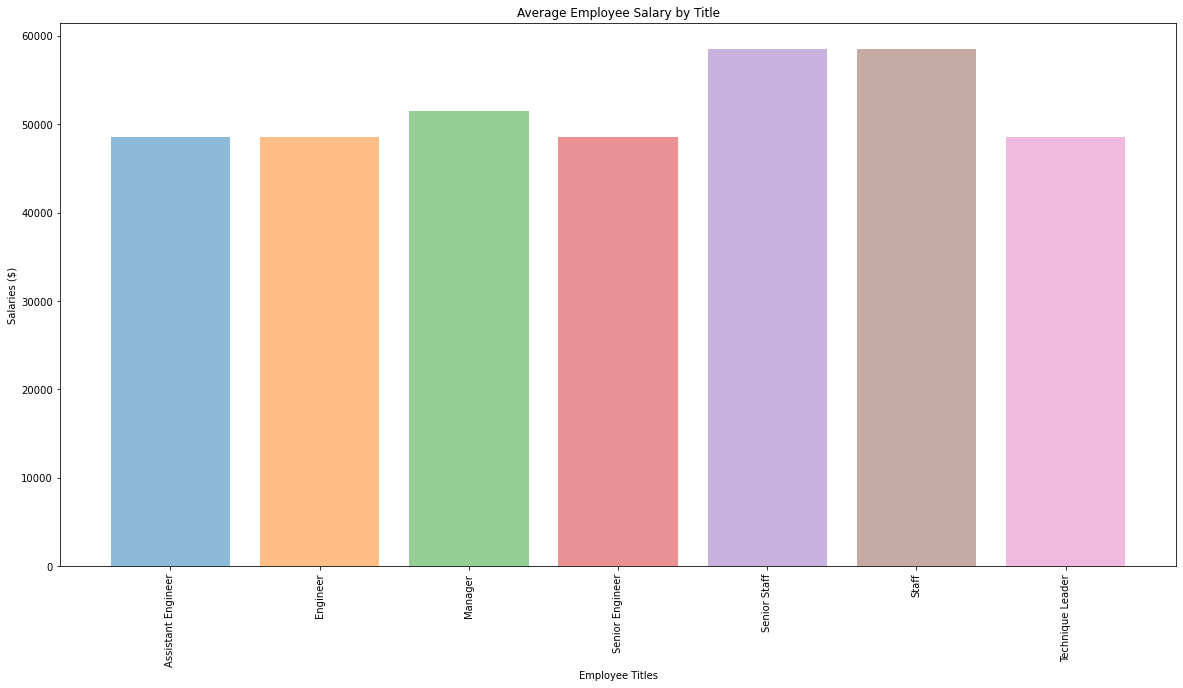

In [10]:
# Set x_axis, y_axis & Tick Locations
x_axis = round_data['title']
ticks = np.arange(len(x_axis))
y_axis = round_data['salary']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2']

# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color = colors)

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Save Figure
plt.savefig("../EmployeeSQL/average_salary_by_title.png")

# Show plot
plt.show()

<h2>Create a histogram to visualize the most common salary ranges for employees</h2>

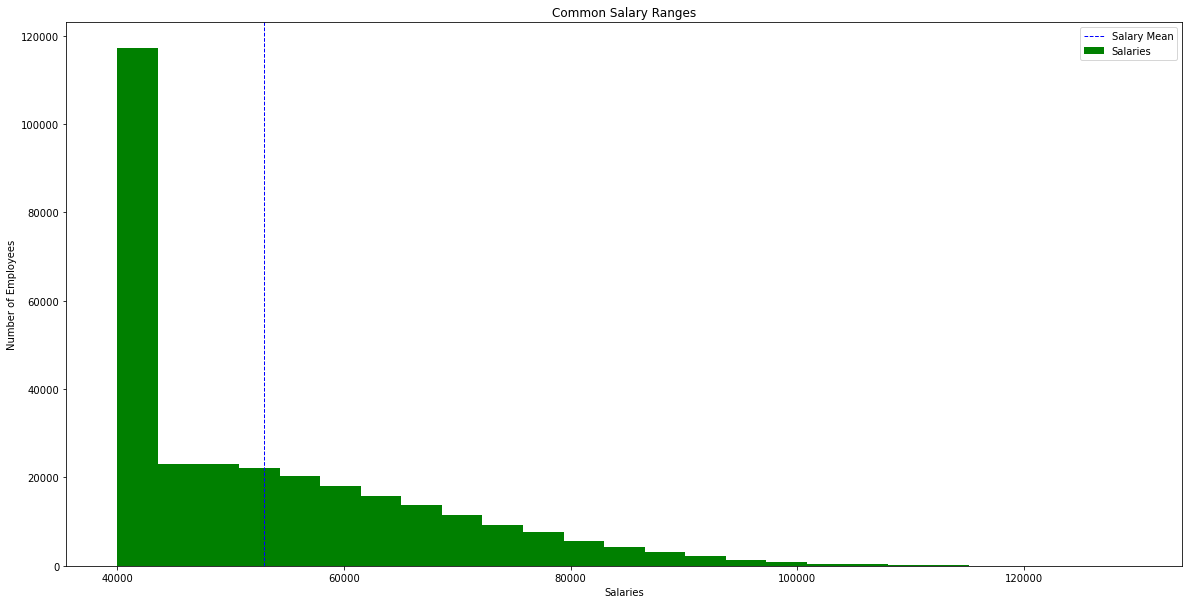

In [11]:
#Create Histogram with a mean salary line 
plt.hist(salaries_data['salary'], 25, density=False, label="Salaries", color='g',)
plt.axvline(salaries_data['salary'].mean(), color="b", linestyle='dashed', linewidth=1, label="Salary Mean")

# Set Labels, Title & Legend
plt.xlabel("Salaries")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")

# Save Figure
plt.savefig("../EmployeeSQL/common_salary_ranges.png")

<h3>Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.</h3>

In [12]:
employees_data =pd.read_sql_query("SELECT * FROM \"Employees\" WHERE emp_no = '499942'",connection)

employees_data

,emp_no,emp_title_id,birth_date,first_name,last_name,gender,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
